In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from childes_mi.utils.paths import CHILDES_DFS, DATA_DIR
from childes_mi.utils.general import flatten

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
transcript_df = pd.read_pickle(CHILDES_DFS/'childes_df_subset.pickle')
#transcript_df['dataset'] = [i[0].split('/')[11] for i in transcript_df.transcript_xml.values]
len(transcript_df)

2785

In [5]:
# mask for only a subset of corpuses
possible_corpuses = [
    # carterette is also transcribed in IPA
    "Carterette",  # 1st, 3rd, 5th grade, adults, speech naturalistic speech in IPA https://childes.talkbank.org/access/Eng-NA/Carterette.html
    "Gillam",  # normal subset, spontaneous storytelling 5-11y11m https://childes.talkbank.org/access/Clinical-MOR/Gillam.html
    "Braunwald",  # single subject from 1-6yo talking to family https://childes.talkbank.org/access/Eng-NA/Braunwald.html
    "Brown",  # 1y6m-5y1m, 3 subjects naturalistic talking to parents https://childes.talkbank.org/access/Eng-NA/Brown.html
    "EllisWeismer",  # 2y6m - 5y6 naturalistic play-oriented talk with instructor # https://childes.talkbank.org/access/Clinical-MOR/EllisWeismer.html
    "Gleason",  # 2;1 - 5;2 family interactions https://childes.talkbank.org/access/Eng-NA/Gleason.html
    "NH",# Nicholas-NH,  # 1;0-4;0, videotaped play with parent https://childes.talkbank.org/access/Clinical-MOR/Nicholas/NH.html
    "Post",  # 1;7-2;8 60m session with family and toys https://childes.talkbank.org/access/Eng-NA/Post.html
    "Normal",  #  Rondal-Normal 3-12yo free play with mother and child https://childes.talkbank.org/access/Clinical-MOR/Normal /Normal.html
]
corpus_mask = [corpus in possible_corpuses for corpus in transcript_df.corpus.values]
transcript_df = transcript_df[corpus_mask]

In [6]:
# mask for a subset of roles
possible_roles = ['Target_Child', 'Child']
role_mask = [role in possible_roles for role in transcript_df.role.values]
transcript_df = transcript_df[role_mask]
len(transcript_df)

2785

In [7]:
transcript_df[:3]

,PID,lang,corpus,date,participant_key,role,age,language,sex,POS,words,morphemes,transcript_xml,n_words,n_morphemes,n_POS,age_months,age_years
72301,11312/c-00015848-1,eng,Carterette,1984-01-01,CHI,Target_Child,P6Y,eng,NaN,"[[pro:per, v, , , conj, n:prop, coord, pro:ind...","[[you, mean, uh, um, like, England, or, someth...","[[you, mean, uh, um, like, England, or, someth...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,19903,2102,2102,72.0,6.0
72302,11312/c-00015847-1,eng,Carterette,1984-01-01,CHI,Target_Child,P10Y,eng,NaN,"[[co, , pro:sub, v, , det:num, n], [coord, , p...","[[well, um, I, have, uh, one, sister], [and, u...","[[well, um, I, have, uh, one, sister], [and, u...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,26941,2729,2729,120.0,10.0
72303,11312/c-00015849-1,eng,Carterette,1984-01-01,CHI,Target_Child,P8Y,eng,NaN,"[[v, n, n], [co, n:prop, v, prep, det:art, n, ...","[[lets, watch, tv], [well, Nancy, said, for, t...","[[let-3S, watch, tv], [well, Nancy, say-PAST, ...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,21419,2019,2019,96.0,8.0


In [8]:
print(transcript_df.corpus.unique())

['Carterette' 'Brown' 'Braunwald' 'Post' 'Gleason' 'Normal' 'Gillam'
 'EllisWeismer' 'NH']


In [9]:
print("there are {} words in this dataset".format(np.sum(transcript_df.n_words.values)))

there are 1247296 words in this dataset


### Get child ages

In [10]:
import re
def convert_age(age_year):
    "Caclculate age in months from a string in CHILDES format"
    if age_year[-1] == 'Y':
        age_year += '0'
    m = re.match("P(\d+)Y(\d+)M?(\d?\d?)D?", age_year)
    age_month = int(m.group(1)) * 12 + int(m.group(2))
    try:
        if int(m.group(3)) > 15:
            age_month += 1
    # some corpora don't have age information?
    except ValueError as e:
        pass
    return age_month

In [11]:
transcript_df["age_months"] = [
    convert_age(i) if type(i) == str else np.nan for i in tqdm(transcript_df.age.values)
]

In [12]:
transcript_df["age_years"] = transcript_df["age_months"] / 12

In [13]:
transcript_df[:3]

,PID,lang,corpus,date,participant_key,role,age,language,sex,POS,words,morphemes,transcript_xml,n_words,n_morphemes,n_POS,age_months,age_years
72301,11312/c-00015848-1,eng,Carterette,1984-01-01,CHI,Target_Child,P6Y,eng,NaN,"[[pro:per, v, , , conj, n:prop, coord, pro:ind...","[[you, mean, uh, um, like, England, or, someth...","[[you, mean, uh, um, like, England, or, someth...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,19903,2102,2102,72.0,6.0
72302,11312/c-00015847-1,eng,Carterette,1984-01-01,CHI,Target_Child,P10Y,eng,NaN,"[[co, , pro:sub, v, , det:num, n], [coord, , p...","[[well, um, I, have, uh, one, sister], [and, u...","[[well, um, I, have, uh, one, sister], [and, u...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,26941,2729,2729,120.0,10.0
72303,11312/c-00015849-1,eng,Carterette,1984-01-01,CHI,Target_Child,P8Y,eng,NaN,"[[v, n, n], [co, n:prop, v, prep, det:art, n, ...","[[lets, watch, tv], [well, Nancy, said, for, t...","[[let-3S, watch, tv], [well, Nancy, say-PAST, ...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,21419,2019,2019,96.0,8.0


### Sentence lengths

In [14]:
age_cohorts = [[1, 1.5], [1.5, 2], [2, 2.5], [2.5, 3], [3, 20]]

## MI
- for each sequence, calculate the decay of a sequence as a function of distance between elements for that sequence indiividually
- Treat each phoneme as unique for that child, and compute MI across children

In [15]:
from childes_mi.information_theory import mutual_information as mi

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.cluster.supervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics.cluster. Anything that cannot be imported from sklearn.metrics.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.cluster.expected_mutual_info_fast module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics.cluster. Anything that cannot be imported from sklearn.metrics.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


#### Run MI by age cohort

In [16]:
distances = np.arange(1,501)

1 1.5 15154 1239


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done   3 out of  50 | elapsed:   12.2s remaining:  3.2min
[Parallel(n_jobs=-1)]: Done   5 out of  50 | elapsed:   12.3s remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   7 out of  50 | elapsed:   12.3s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   9 out of  50 | elapsed:   12.4s remaining:   56.3s
[Parallel(n_jobs=-1)]: Done  11 out of  50 | elapsed:   12.4s remaining:   43.9s
[Parallel(n_jobs=-1)]: Done  13 out of  50 | elapsed:   12.4s remaining:   35.3s
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:   12.4s remaining:   29.0s
[Parallel(n_jobs=-1)]: Done  17 out of  50 | elapsed:   12.4s remaining:   24.2s
[Parallel(n_jobs=-1)]: Done  19 out of  50 | elapsed:   12.5s remaining:   20.4s
[Parallel(n_jobs=-1)]: Done  21 out of  50 | elapsed:   12.5s remaining:   17.2s
[Parallel(n_jobs=-1)]: Done  23 out of  50 | elapse

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done   3 out of  50 | elapsed:    8.7s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   5 out of  50 | elapsed:    8.7s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   7 out of  50 | elapsed:    8.8s remaining:   53.8s
[Parallel(n_jobs=-1)]: Done   9 out of  50 | elapsed:    8.8s remaining:   40.0s
[Parallel(n_jobs=-1)]: Done  11 out of  50 | elapsed:    8.8s remaining:   31.2s
[Parallel(n_jobs=-1)]: Done  13 out of  50 | elapsed:    8.8s remaining:   25.1s
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:    8.8s remaining:   20.6s
[Parallel(n_jobs=-1)]: Done  17 out of  50 | elapsed:    8.9s remaining:   17.2s
[Parallel(n_jobs=-1)]: Done  19 out of  50 | elapsed:    8.9s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done  21 out of  50 | elapsed:    8.9s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done  23 out of  50 | elapse

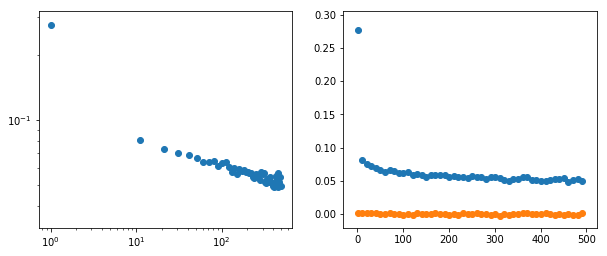

In [183]:
mi_estimation = "adjusted_mi_sklearn"
mi_df = pd.DataFrame(
    columns=[
        "MI",
        "MI_var",
        "shuff_MI",
        "shuff_MI_var",
        "distances",
        "age_cohort_low",
        "age_cohort_high",
        "n_words",
        "n_unique_words",
    ]
)
# for each age cohort
for (age_cohort_low, age_cohort_high) in tqdm(age_cohorts):#[::-1]):
    cohort_subset = transcript_df[
        (transcript_df.age_months/12 > age_cohort_low) & (transcript_df.age_months/12 <= age_cohort_high)
    ]
    
    #cohort_words = [[row.PID + "_" + i for i in list(flatten(row.words)) if i not in [None, 'xxx']] for idx, row in cohort_subset.iterrows()]
    cohort_words = [[i for i in list(flatten(row.words)) if i not in [None, 'xxx']] for idx, row in cohort_subset.iterrows()]
    
    n_words = len(np.concatenate(cohort_words))
    n_unique_words = len(np.unique(np.concatenate(cohort_words)))
    print(age_cohort_low, age_cohort_high, n_words, n_unique_words)
    
    distances = np.arange(1,500, 10)
    (MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
        [cohort_words], distances=distances, n_jobs=-1, mi_estimation=mi_estimation, prefer = None, verbosity=49
    )
    
    fig,axs = plt.subplots(ncols=2, figsize = (10,4))
    ax = axs[0]
    ax.scatter(distances, MI-shuff_MI)
    ax.plot(distances, MI-shuff_MI, alpha = 0)
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax = axs[1]
    ax.scatter(distances, MI)
    ax.scatter(distances, shuff_MI)
    plt.show()
    
    mi_df.loc[len(mi_df)] = [
        MI,
        MI_var,
        shuff_MI,
        shuff_MI_var,
        distances,
        age_cohort_low,
        age_cohort_high,
        n_words,
        n_unique_words,
        
    ]
    
    #mi_df.to_pickle(DATA_DIR / 'mi' / 'childes_indv_ami.pickle')
    break

In [18]:
mi_df

,MI,MI_var,shuff_MI,shuff_MI_var,distances,age_cohort_low,age_cohort_high,n_words,n_unique_words
0,"[3.387548646710555, 2.8018499954888827, 2.8649...","[2.4177923448459433, 2.506522706665155, 2.5781...","[2.614160661573555, 2.6911346226573105, 2.7527...","[2.4166601184999097, 2.512773702835437, 2.5892...","[1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 1...",1,1.5,15154,1239


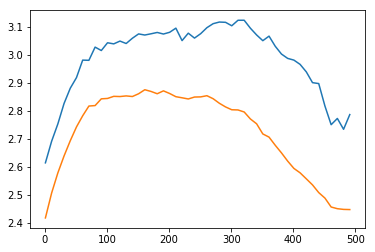

In [26]:
row = mi_df.iloc[0]
plt.plot(distances, row.shuff_MI)
plt.plot(distances, row.MI_var)

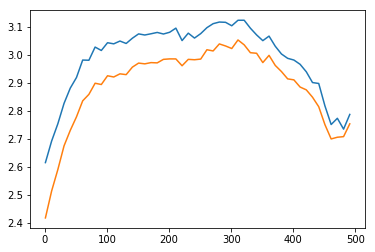

In [27]:
plt.plot(distances, row.shuff_MI)
plt.plot(distances, row.shuff_MI_var)

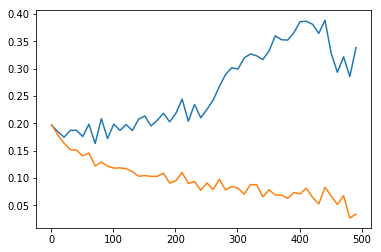

In [25]:
plt.plot(distances, row.shuff_MI -row.MI_var)
plt.plot(distances, row.shuff_MI -row.shuff_MI_var)

In [164]:
distances

array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491])

In [165]:
#cohort_words = [[row.PID + "_" + i for i in list(flatten(row.words)) if i not in [None, 'xxx']] for idx, row in cohort_subset.iterrows()]
sequences = [[i for i in list(flatten(row.words)) if i not in [None, 'xxx']] for idx, row in cohort_subset.iterrows()]

n_words = len(np.concatenate(cohort_words))
n_unique_words = len(np.unique(np.concatenate(cohort_words)))
print(age_cohort_low, age_cohort_high, n_words, n_unique_words)

1 1.5 15154 1239


In [182]:
np.save('childes_test_seqs.npy', np.array(sequences))

In [166]:
from joblib import Parallel, delayed

In [167]:
from childes_mi.information_theory.mutual_information import MI_from_distributions

In [168]:
n_shuff_repeats = 1
disable_tqdm=False
with Parallel(n_jobs=-1, verbose=0, prefer=None) as parallel:
    distances_rep = np.repeat(distances, n_shuff_repeats)
    shuff_MI = parallel(
        delayed(MI_from_distributions)(
            [np.random.permutation(i) for i in sequences],
            dist,
            unclustered_element=None,
            n_jobs = 1,
            mi_estimation=None,
        )
        for dist_i, dist in enumerate(
            tqdm(distances_rep, leave=False, disable=disable_tqdm)
        )
    )
    shuff_MI = np.reshape(shuff_MI, (len(distances), n_shuff_repeats, 2))
    shuff_MI = np.mean(shuff_MI, axis=1)

In [169]:
shuff_MI = shuff_MI.T[0]

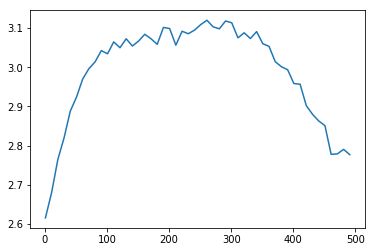

In [170]:
plt.plot(distances, shuff_MI)

In [171]:
from sklearn.metrics.cluster.supervised import contingency_matrix
import numpy as np
from sklearn.metrics import (
    mutual_info_score,
    normalized_mutual_info_score,
    adjusted_mutual_info_score,
)
from childes_mi.information_theory.expected_mutual_information import emi_parallel
#from .emi._expected_mutual_info_fast import expected_mutual_information
from childes_mi.information_theory.emi._expected_mutual_info_fast_sklearn import expected_mutual_information




def adjusted_mutual_information(labels_true, labels_pred, n_jobs = -1, emi_method="parallel", use_cython=True,
                               average_method='arithmetic'):
    """Adjusted Mutual Information.
    Adjusted Mutual Information (AMI) is an adjustment of the Mutual
    Information (MI) score to account for chance. It accounts for the fact that
    the MI is generally higher for two clusterings with a larger number of
    clusters, regardless of whether there is actually more information shared.
    For two clusterings :math:`U` and :math:`V`, the AMI is given as::
        AMI(U, V) = [MI(U, V) - E(MI(U, V))] / [avg(H(U), H(V)) - E(MI(U, V))]
    
    """
    n_samples = labels_true.shape[0]
    classes = np.unique(labels_true)
    clusters = np.unique(labels_pred)
    # Special limit cases: no clustering since the data is not split.
    # This is a perfect match hence return 1.0.
    if (classes.shape[0] == clusters.shape[0] == 1 or
            classes.shape[0] == clusters.shape[0] == 0):
        return 1.0
    contingency = contingency_matrix(labels_true, labels_pred, sparse=True)
    contingency = contingency.astype(np.float64,
                                     **_astype_copy_false(contingency))
    # Calculate the MI for the two clusterings
    mi = mutual_info_score(labels_true, labels_pred,
                           contingency=contingency)
    # Calculate the expected value for the mutual information
    if emi_method == "parallel":
        emi = emi_parallel(contingency, n_samples, use_cython = use_cython, n_jobs=n_jobs)
    else:
        emi = expected_mutual_information(contingency, n_samples)
    # Calculate entropy for each labeling
    h_true, h_pred = entropy(labels_true), entropy(labels_pred)
    normalizer = _generalized_average(h_true, h_pred, average_method)
    denominator = normalizer - emi
    # Avoid 0.0 / 0.0 when expectation equals maximum, i.e a perfect match.
    # normalizer should always be >= emi, but because of floating-point
    # representation, sometimes emi is slightly larger. Correct this
    # by preserving the sign.
    if denominator < 0:
        denominator = min(denominator, -np.finfo('float64').eps)
    else:
        denominator = max(denominator, np.finfo('float64').eps)
    ami = (mi - emi) / denominator
    return ami, emi


def entropy(labels):
    """Calculates the entropy for a labeling.
    Parameters
    ----------
    labels : int array, shape = [n_samples]
        The labels
    Notes
    -----
    The logarithm used is the natural logarithm (base-e).
    """
    if len(labels) == 0:
        return 1.0
    label_idx = np.unique(labels, return_inverse=True)[1]
    pi = np.bincount(label_idx).astype(np.float64)
    pi = pi[pi > 0]
    pi_sum = np.sum(pi)
    # log(a / b) should be calculated as log(a) - log(b) for
    # possible loss of precision
    return -np.sum((pi / pi_sum) * (np.log(pi) - np.log(pi_sum)))

def _generalized_average(U, V, average_method="arithmetic"):
    """Return a particular mean of two numbers."""
    if average_method == "min":
        return min(U, V)
    elif average_method == "geometric":
        return np.sqrt(U * V)
    elif average_method == "arithmetic":
        return np.mean([U, V])
    elif average_method == "max":
        return max(U, V)
    else:
        raise ValueError("'average_method' must be 'min', 'geometric', "
                         "'arithmetic', or 'max'")


def _parse_version(version_string):
    version = []
    for x in version_string.split('.'):
        try:
            version.append(int(x))
        except ValueError:
            # x may be of the form dev-1ea1592
            version.append(x)
    return tuple(version)

import scipy
sp_version = _parse_version(scipy.__version__)

def _astype_copy_false(X):
    """Returns the copy=False parameter for
    {ndarray, csr_matrix, csc_matrix}.astype when possible,
    otherwise don't specify
    """
    if sp_version >= (1, 1) or not sp.issparse(X):
        return {'copy': False}
    else:
        return {}

In [172]:
######## Mutual Information From distributions ############
def MI_from_distributions(
    sequences,
    dist,
    estimate=False,
    unclustered_element=None,
    use_sklearn=True,
    n_jobs = -1,
    mi_estimation = "grassberger", # "adjusted_mi", None
    **mi_kwargs
):
    np.random.seed()  # set seed
    # create distributions
    if np.sum([len(seq) > dist for seq in sequences]) == 0:
        return (np.nan, np.nan)

    distribution_a = np.concatenate(
        [seq[dist:] for seq in sequences if len(seq) > dist]
    )

    distribution_b = np.concatenate(
        [seq[:-dist] for seq in sequences if len(seq) > dist]
    )

    # mask unclustered so they are not considered in MI
    if unclustered_element is not None:
        mask = (distribution_a == unclustered_element) | (
            distribution_b == unclustered_element
        )
        distribution_a = distribution_a[mask == False]
        distribution_b = distribution_b[mask == False]

    # calculate MI

    if mi_estimation == "grassberger":
        # See Grassberger, P. Entropy estimates from insufficient samplings. arXiv 2003, arXiv:0307138
        return est_mutual_info_p(distribution_a, distribution_b, **mi_kwargs)
    elif mi_estimation == "adjusted_mi":
        # See Vinh, Epps, and Bailey, (2010). Information Theoretic Measures for Clusterings Comparison: Variants, Properties, Normalization and Correction for Chance, JMLR
        return adjusted_mutual_information(distribution_a, distribution_b, n_jobs=n_jobs, **mi_kwargs)
    elif mi_estimation == "adjusted_mi_sklearn":
        # See Vinh, Epps, and Bailey, (2010). Information Theoretic Measures for Clusterings Comparison: Variants, Properties, Normalization and Correction for Chance, JMLR
        #return (adjusted_mutual_info_score(distribution_a, distribution_b), 0)
        return adjusted_mutual_information(distribution_a, distribution_b, emi_method="sklearn", **mi_kwargs)
    elif mi_estimation is None:
        return (mutual_info_score(distribution_a, distribution_b, **mi_kwargs), 0)
    else:
        raise ValueError("MI estimator '{}' is not implemented".format(mi_estimation))

In [173]:
import joblib

In [174]:
with joblib.parallel_backend('multiprocessing'):

    with Parallel(n_jobs=-1, verbose=5, prefer=None) as parallel:
        MI = parallel(
            delayed(MI_from_distributions)(
                sequences,
                dist,
                estimate=None,
                unclustered_element=None,
                n_jobs = 1,
                mi_estimation='adjusted_mi_sklearn',
            )
            for dist_i, (dist) in enumerate(
                tqdm(distances, leave=True, disable=disable_tqdm)
            )
        )

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  50 | elapsed:    2.0s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  20 out of  50 | elapsed:    2.6s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  31 out of  50 | elapsed:    2.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  42 out of  50 | elapsed:    4.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.3s finished


In [175]:
MI = np.array(MI).T[0]

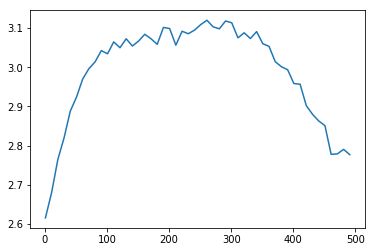

In [176]:
plt.plot(distances, shuff_MI)

In [177]:
def MI_from_distributions(
    sequences,
    dist,
    estimate=False,
    unclustered_element=None,
    use_sklearn=True,
    n_jobs = -1,
    mi_estimation = "grassberger", # "adjusted_mi", None
    **mi_kwargs
):
    np.random.seed()  # set seed
    # create distributions
    if np.sum([len(seq) > dist for seq in sequences]) == 0:
        return (np.nan, np.nan)

    distribution_a = np.concatenate(
        [seq[dist:] for seq in sequences if len(seq) > dist]
    )

    distribution_b = np.concatenate(
        [seq[:-dist] for seq in sequences if len(seq) > dist]
    )

    # mask unclustered so they are not considered in MI
    if unclustered_element is not None:
        mask = (distribution_a == unclustered_element) | (
            distribution_b == unclustered_element
        )
        distribution_a = distribution_a[mask == False]
        distribution_b = distribution_b[mask == False]

    # calculate MI

    if mi_estimation == "grassberger":
        # See Grassberger, P. Entropy estimates from insufficient samplings. arXiv 2003, arXiv:0307138
        return est_mutual_info_p(distribution_a, distribution_b, **mi_kwargs)
    elif mi_estimation == "adjusted_mi":
        # See Vinh, Epps, and Bailey, (2010). Information Theoretic Measures for Clusterings Comparison: Variants, Properties, Normalization and Correction for Chance, JMLR
        return adjusted_mutual_information(distribution_a, distribution_b, n_jobs=n_jobs, **mi_kwargs)
    elif mi_estimation == "adjusted_mi_sklearn":
        # See Vinh, Epps, and Bailey, (2010). Information Theoretic Measures for Clusterings Comparison: Variants, Properties, Normalization and Correction for Chance, JMLR
        #return (adjusted_mutual_info_score(distribution_a, distribution_b), 0)
        return adjusted_mutual_information(distribution_a, distribution_b, emi_method="sklearn", **mi_kwargs)
    elif mi_estimation is None:
        return (mutual_info_score(distribution_a, distribution_b, **mi_kwargs), 0)
    else:
        raise ValueError("MI estimator '{}' is not implemented".format(mi_estimation))

def sequential_mutual_information(
    sequences,
    distances,
    n_jobs=1,
    verbosity=5,
    n_shuff_repeats=1,
    estimate=True,
    disable_tqdm=False,
    prefer="threads",  # is None better here?
    mi_estimation = "grassberger",
    unclustered_element=None,
    **mi_kwargs
):
    """
    Compute mutual information as a function of distance between sequences
    if n_jobs > 1,  will run in parallel
    """
    # convert to numeric for faster computation
    unique_elements = np.unique(np.concatenate(sequences))
    n_unique = len(unique_elements)
    seq_dict = {j: i for i, j in enumerate(unique_elements)}
    if n_unique < 256:
        sequences = [
            np.array([seq_dict[i] for i in seq]).astype("uint8") for seq in sequences
        ]
    elif n_unique < 65535:
        sequences = [
            np.array([seq_dict[i] for i in seq]).astype("uint16") for seq in sequences
        ]
    else:
        sequences = [
            np.array([seq_dict[i] for i in seq]).astype("uint32") for seq in sequences
        ]

    if unclustered_element is not None:
        unclustered_element = seq_dict[unclustered_element]
        print(unclustered_element)
    else:
        unclustered_element = None


    if mi_estimation == "adjusted_mi":
        # because parallelization occurs within the function
        _n_jobs = copy.deepcopy(n_jobs)
        n_jobs = 1
    else:
        _n_jobs = 1
    # compute MI
    if n_jobs == 1:
        MI = [
            MI_from_distributions(
                sequences,
                dist,
                estimate=estimate,
                unclustered_element=unclustered_element,
                mi_estimation=mi_estimation,
                **mi_kwargs
            )
            for dist_i, dist in enumerate(
                tqdm(distances, leave=False, disable=disable_tqdm)
            )
        ]
        distances_rep = np.repeat(distances, n_shuff_repeats)
        shuff_MI = [
            MI_from_distributions(
                [np.random.permutation(i) for i in sequences],
                dist,
                estimate=estimate,
                mi_estimation=mi_estimation,
                **mi_kwargs
            )
            for dist_i, dist in enumerate(
                tqdm(distances_rep, leave=False, disable=disable_tqdm)
            )
        ]

        shuff_MI = np.reshape(shuff_MI, (len(distances), n_shuff_repeats, 2))
        shuff_MI = np.mean(shuff_MI, axis=1)

    else:
        with Parallel(n_jobs=n_jobs, verbose=verbosity, prefer=prefer) as parallel:
            MI = parallel(
                delayed(MI_from_distributions)(
                    sequences,
                    dist,
                    estimate=estimate,
                    unclustered_element=unclustered_element,
                    n_jobs = _n_jobs,
                    mi_estimation=mi_estimation,
                    **mi_kwargs
                )
                for dist_i, dist in enumerate(
                    tqdm(distances, leave=False, disable=disable_tqdm)
                )
            )

        with Parallel(n_jobs=n_jobs, verbose=verbosity, prefer=prefer) as parallel:
            distances_rep = np.repeat(distances, n_shuff_repeats)
            shuff_MI = parallel(
                delayed(MI_from_distributions)(
                    [np.random.permutation(i) for i in sequences],
                    dist,
                    estimate=estimate,
                    unclustered_element=unclustered_element,
                    n_jobs = _n_jobs,
                    mi_estimation=mi_estimation,
                    **mi_kwargs
                )
                for dist_i, dist in enumerate(
                    tqdm(distances_rep, leave=False, disable=disable_tqdm)
                )
            )
            shuff_MI = np.reshape(shuff_MI, (len(distances), n_shuff_repeats, 2))
            shuff_MI = np.mean(shuff_MI, axis=1)

    return np.array(MI).T, np.array(shuff_MI).T

In [178]:
(MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
        cohort_words, distances=distances, n_jobs=-1, mi_estimation=mi_estimation, prefer = None, verbosity=49
)
    

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   3 out of  50 | elapsed:    1.3s remaining:   21.0s
[Parallel(n_jobs=-1)]: Done   5 out of  50 | elapsed:    1.5s remaining:   13.3s
[Parallel(n_jobs=-1)]: Done   7 out of  50 | elapsed:    1.6s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done   9 out of  50 | elapsed:    1.7s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  11 out of  50 | elapsed:    1.9s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  13 out of  50 | elapsed:    2.2s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:    2.2s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  17 out of  50 | elapsed:    2.2s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  19 out of  50 | elapsed:    2.2s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  21 out of  50 | elapsed:    2.3s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  23 out of  50 | elapse

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   3 out of  50 | elapsed:    1.8s remaining:   28.8s
[Parallel(n_jobs=-1)]: Done   5 out of  50 | elapsed:    1.9s remaining:   17.3s
[Parallel(n_jobs=-1)]: Done   7 out of  50 | elapsed:    2.0s remaining:   12.1s
[Parallel(n_jobs=-1)]: Done   9 out of  50 | elapsed:    2.1s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  11 out of  50 | elapsed:    2.3s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  13 out of  50 | elapsed:    2.5s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  15 out of  50 | elapsed:    2.8s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  17 out of  50 | elapsed:    2.9s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  19 out of  50 | elapsed:    2.9s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  21 out of  50 | elapsed:    3.0s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  23 out of  50 | elapse

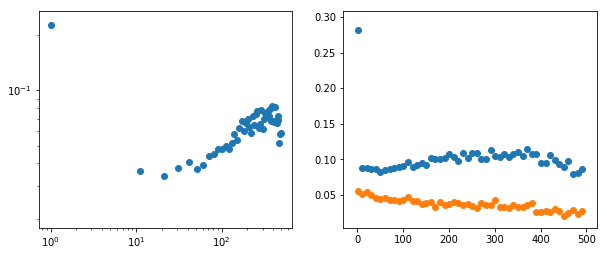

In [180]:
fig,axs = plt.subplots(ncols=2, figsize = (10,4))
ax = axs[0]
ax.scatter(distances, MI-shuff_MI)
ax.plot(distances, MI-shuff_MI, alpha = 0)
ax.set_yscale('log')
ax.set_xscale('log')

ax = axs[1]
ax.scatter(distances, MI)
ax.scatter(distances, shuff_MI)
plt.show()

In [ ]:
def adjusted_mutual_information(labels_true, labels_pred, n_jobs = -1, emi_method="parallel", use_cython=True,
                               average_method='arithmetic'):
    """Adjusted Mutual Information.
    Adjusted Mutual Information (AMI) is an adjustment of the Mutual
    Information (MI) score to account for chance. It accounts for the fact that
    the MI is generally higher for two clusterings with a larger number of
    clusters, regardless of whether there is actually more information shared.
    For two clusterings :math:`U` and :math:`V`, the AMI is given as::
        AMI(U, V) = [MI(U, V) - E(MI(U, V))] / [avg(H(U), H(V)) - E(MI(U, V))]
    
    """
    n_samples = labels_true.shape[0]
    classes = np.unique(labels_true)
    clusters = np.unique(labels_pred)
    # Special limit cases: no clustering since the data is not split.
    # This is a perfect match hence return 1.0.
    if (classes.shape[0] == clusters.shape[0] == 1 or
            classes.shape[0] == clusters.shape[0] == 0):
        return 1.0
    contingency = contingency_matrix(labels_true, labels_pred, sparse=True)
    contingency = contingency.astype(np.float64,
                                     **_astype_copy_false(contingency))
    # Calculate the MI for the two clusterings
    mi = mutual_info_score(labels_true, labels_pred,
                           contingency=contingency)
    # Calculate the expected value for the mutual information
    if emi_method == "parallel":
        emi = emi_parallel(contingency, n_samples, use_cython = use_cython, n_jobs=n_jobs)
    else:
        emi = expected_mutual_information(contingency, n_samples)
    # Calculate entropy for each labeling
    h_true, h_pred = entropy(labels_true), entropy(labels_pred)
    normalizer = _generalized_average(h_true, h_pred, average_method)
    denominator = normalizer - emi
    # Avoid 0.0 / 0.0 when expectation equals maximum, i.e a perfect match.
    # normalizer should always be >= emi, but because of floating-point
    # representation, sometimes emi is slightly larger. Correct this
    # by preserving the sign.
    if denominator < 0:
        denominator = min(denominator, -np.finfo('float64').eps)
    else:
        denominator = max(denominator, np.finfo('float64').eps)
    ami = (mi - emi) / denominator
    return ami, emi